In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv("/content/drive/MyDrive/112_1/MachineLearning/train_new.csv")
test = pd.read_csv("/content/drive/MyDrive/112_1/MachineLearning/test_new.csv")

In [4]:
# mean
height = train["height"]
mean_height = np.mean(height)
# var
var_height = np.var(height)

new = []
for i in range(len(height)):
  temp = (height[i] - mean_height)/var_height
  temp = temp * 10
  new.append(temp)

In [5]:
list_policyholder = list(train["age_of_policyholder"])
new_feature = []
for i in range(len(new)):
  temp = list_policyholder[i] - new[i]
  new_feature.append(temp)
dict_new_feature = {"new_feature": new_feature}
df_newfeature = pd.DataFrame(dict_new_feature)
df_newfeature

,new_feature
0,0.767796
1,0.498565
2,0.508181
3,0.493162
4,0.734520
...,...
58587,0.744135
58588,0.642796
58589,0.575488
58590,0.594501


In [6]:
train_with_new_feature = pd.concat([train, df_newfeature], axis = 1)
train_with_new_feature

,policy_id,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,...,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,steering_type_Electric,steering_type_Manual,steering_type_Power,is_claim,new_feature
0,ID00001,0.515874,0.05,0.644231,4990,1,2,0,0,0,...,1,0,0,0,0,0,0,1,0,0.767796
1,ID00002,0.672619,0.02,0.375000,27003,1,2,0,0,0,...,1,0,0,0,0,0,0,1,0,0.498565
2,ID00003,0.841110,0.02,0.384615,4076,1,2,0,0,0,...,1,0,0,0,0,0,0,1,0,0.508181
3,ID00004,0.900277,0.11,0.432692,21622,1,2,1,1,0,...,0,0,0,0,0,1,0,0,0,0.493162
4,ID00005,0.596403,0.11,0.634615,34738,2,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0.734520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,8794,2,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0.744135
58588,ID58589,1.199642,0.02,0.519231,7788,1,2,0,0,0,...,1,0,0,0,0,0,0,1,0,0.642796
58589,ID58590,1.162273,0.05,0.451923,34738,1,2,0,0,0,...,1,0,0,0,0,0,0,1,0,0.575488
58590,ID58591,1.236307,0.14,0.557692,8794,1,2,0,1,0,...,0,0,1,0,0,1,0,0,0,0.594501


In [7]:
train0 = train_with_new_feature[train_with_new_feature["is_claim"] == 0].sample(1000, random_state=42)
train1 = train_with_new_feature[train_with_new_feature["is_claim"] == 1].sample(500, random_state=42)
train_new = pd.concat([train0, train1], ignore_index=False)
train_new = train_new.sample(frac=1, random_state=42, ignore_index=False)

In [8]:
x_train = train_new.drop(["policy_id", "is_claim"], axis="columns")
y_train = train_new["is_claim"]

In [9]:
def split(x, y, test_size=0.2):
    i = int((1 - test_size) * x.shape[0])
    o = np.random.permutation(x.shape[0])

    x_train, x_test = np.split(np.take(x,o,axis=0), [i])
    y_train, y_test = np.split(np.take(y,o), [i])
    return x_train, x_test, y_train, y_test

In [10]:
x_train, x_valid, y_train, y_valid = split(x_train, y_train, test_size=0.2)

Linear Classifier

In [11]:
import matplotlib.pyplot as plt
import random

In [12]:
class LinearClassifier:
    def __init__(self, learning_rate=0.001, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.W = 0
        self.b = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_weights_and_bias(self, num_of_feature):
      self.W = np.full((1, num_of_feature),0.01)
      self.b = 0.0
      return self.W, self.b

    def forward_backward_propagation(self, x_train, y_train):
      num_of_feature = x_train.shape[1]
      self.W, self.b = self.initialize_weights_and_bias(num_of_feature)
      y = np.dot(self.W, x_train.T) + self.b
      y_head = self.sigmoid(y)
      loss = (y_train*np.log(y_head[0]))+((1-y_train)*np.log(1-y_head[0]))
      cost = (np.sum(loss)) / (-x_train.shape[0])

      #Backward Propogation
      derivative_weight = (np.dot((y_head[0]-y_train),(x_train)))/x_train.shape[0]
      derivative_bias = np.sum(y_head[0]-y_train)/x_train.shape[0]
      gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
      return cost, gradients

    def fit(self, x_train, y_train):
        cost_list = []
        index = []

        for i in range(self.num_iterations):
            cost, gradients = self.forward_backward_propagation(x_train, y_train)
            cost_list.append(cost)
            index.append(i)
            self.W = self.W - self.learning_rate * gradients["derivative_weight"]
            self.b = self.b - self.learning_rate * gradients["derivative_bias"]

            if i % 10 == 0:
                print("Cost after iteration %i: %f" % (i, cost))

        parameters = {"Weight": self.W, "Bias": self.b}
        plt.plot(index, cost_list)
        plt.xticks(index, rotation='vertical')
        plt.xlabel("Number of Iteration")
        plt.ylabel("Cost")
        plt.show()
        return parameters, gradients, cost_list

    def predict(self, x_test):
        y = self.sigmoid(np.dot(self.W, x_test.T) + self.b)
        y_pred = np.zeros((1, x_test.shape[0]))

        for i in range(y.shape[0]):
            if y[0, i] < 0.5:
                y_pred[0, i] = 0
            else:
                y_pred[0, i] = 1

        return y_pred

    def score(self, y_true, y_pred):
      accuracy = 0
      for i in range(y_true.shape[0]):
        if y_true[i] == y_pred[0][i]:
          accuracy = accuracy + 1
      accuracy = (accuracy/y_true.shape[0])*100
      print("Test Accuracy = ",accuracy, "%")

<ipython-input-12-67a8f8a978dd>:21: RuntimeWarning: divide by zero encountered in log
  loss = (y_train*np.log(y_head[0]))+((1-y_train)*np.log(1-y_head[0]))
<ipython-input-12-67a8f8a978dd>:21: RuntimeWarning: invalid value encountered in multiply
  loss = (y_train*np.log(y_head[0]))+((1-y_train)*np.log(1-y_head[0]))


Cost after iteration 0: nan
Cost after iteration 10: nan
Cost after iteration 20: nan
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan


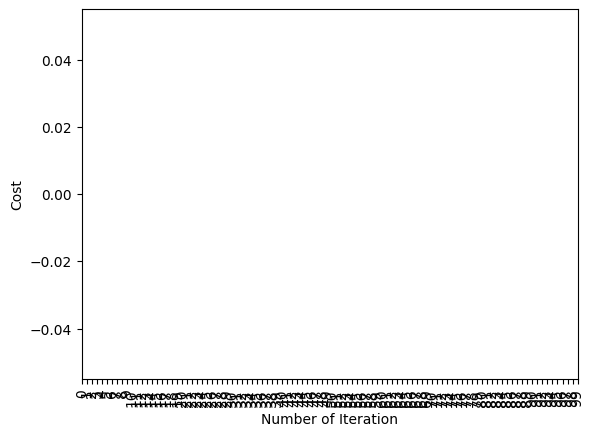

Test Accuracy =  69.0 %


<ipython-input-12-67a8f8a978dd>:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [13]:
x_linear_train = np.array(x_train)
x_linear_valid = np.array(x_valid)
y_linear_train = np.array(y_train)
y_linear_valid = np.array(y_valid)
linearclassifier = LinearClassifier()
linearclassifier.fit(x_linear_train, y_linear_train)
y_pred = linearclassifier.predict(x_linear_valid)
linearclassifier.score(y_linear_valid, y_pred)

In [27]:
import math

def unique_vals(rows, col):
    return set([row[col] for row in rows])


def class_counts(rows):
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts


def max_label(dict):
    max_count = 0
    label = ""

    for key, value in dict.items():
        if dict[key] > max_count:
            max_count = dict[key]
            label = key

    return label


def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)


class Question:
    def __init__(self, column, value, header):
        self.column = column
        self.value = value
        self.header = header

    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            self.header[self.column], condition, str(self.value))


def partition(rows, question):
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows


def gini(rows):
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity


def entropy(rows):
    entries = class_counts(rows)
    avg_entropy = 0
    size = float(len(rows))
    for label in entries:
        prob = entries[label] / size
        avg_entropy = avg_entropy + (prob * math.log(prob, 2))
    return -1*avg_entropy


def information_gain(left, right, current_uncertainty):
    p = float(len(left)) / (len(left) + len(right))

    return current_uncertainty - p * entropy(left) - (1 - p) * entropy(right)

def find_best_split(rows, header):
    best_gain = 0
    best_question = None
    current_uncertainty = entropy(rows)
    n_features = len(rows[0]) - 1

    for col in range(n_features):
        values = set([row[col] for row in rows])
        for val in values:
            question = Question(col, val, header)
            true_rows, false_rows = partition(rows, question)
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            gain = information_gain(true_rows, false_rows, current_uncertainty)
            if gain > best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question


class Leaf:
    def __init__(self, rows, id, depth):
        self.predictions = class_counts(rows)
        self.predicted_label = max_label(self.predictions)
        self.id = id
        self.depth = depth


class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch,
                 depth,
                 id,
                 rows):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        self.depth = depth
        self.id = id
        self.rows = rows


def build_tree(rows, header, depth=0, id=0):
    gain, question = find_best_split(rows, header)
    if gain == 0:
        return Leaf(rows, id, depth)

    true_rows, false_rows = partition(rows, question)

    true_branch = build_tree(true_rows, header, depth + 1, 2 * id + 2)

    false_branch = build_tree(false_rows, header, depth + 1, 2 * id + 1)

    return Decision_Node(question, true_branch, false_branch, depth, id, rows)


def prune_tree(node, prunedList):
    if isinstance(node, Leaf):
        return node

    if int(node.id) in prunedList:
        return Leaf(node.rows, node.id, node.depth)

    node.true_branch = prune_tree(node.true_branch, prunedList)

    node.false_branch = prune_tree(node.false_branch, prunedList)

    return node


def classify(row, node):
    if isinstance(node, Leaf):
        return node.predicted_label
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)


def print_tree(node, spacing=""):
    if isinstance(node, Leaf):
        print(spacing + "Leaf id: " + str(node.id) + " Predictions: " + str(node.predictions) + " Label Class: " + str(node.predicted_label))
        return

    print(spacing + str(node.question) + " id: " + str(node.id) + " depth: " + str(node.depth))

    print(spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    print(spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")


def print_leaf(counts):
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs


def getLeafNodes(node, leafNodes =[]):
    if isinstance(node, Leaf):
        leafNodes.append(node)
        return

    getLeafNodes(node.true_branch, leafNodes)

    getLeafNodes(node.false_branch, leafNodes)

    return leafNodes


def getInnerNodes(node, innerNodes =[]):

    if isinstance(node, Leaf):
        return

    innerNodes.append(node)

    getInnerNodes(node.true_branch, innerNodes)

    getInnerNodes(node.false_branch, innerNodes)

    return innerNodes


def computeAccuracy(rows, node):

    count = len(rows)
    if count == 0:
        return 0

    accuracy = 0
    for row in rows:
        if row[-1] == classify(row, node):
            accuracy += 1
    return round(accuracy/count, 2)

In [16]:
class Leaf:
    def __init__(self, rows, id, depth):
        self.predictions = class_counts(rows)
        self.predicted_label = max_label(self.predictions)
        self.id = id
        self.depth = depth

class Decision_Node:
    def __init__(self, question, true_branch, false_branch, depth):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        self.depth = depth

class Question:
    def __init__(self, column, value, header):
        self.column = column
        self.value = value
        self.header = header

    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            self.header[self.column], condition, str(self.value))

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X_train, y_train):
        data = np.column_stack((X_train, y_train))
        header = list(range(X_train.shape[1])) + ["label"]
        self.tree = self.build_tree(data, header, depth=0)

    def predict(self, X_test):
        predictions = []
        for example in X_test:
            predictions.append(self.classify(example, self.tree))
        return np.array(predictions)

    def unique_vals(self, rows, col):
        return set(row[col] for row in rows)

    def class_counts(self, rows):
        counts = {}
        for row in rows:
            label = row[-1]
            if label not in counts:
                counts[label] = 0
            counts[label] += 1
        return counts

    def gini(self, rows):
        counts = self.class_counts(rows)
        impurity = 1
        for lbl in counts:
            prob_of_lbl = counts[lbl] / float(len(rows))
            impurity -= prob_of_lbl**2
        return impurity

    def information_gain(self, left, right, current_uncertainty):
        p = float(len(left)) / (len(left) + len(right))
        return current_uncertainty - p * self.gini(left) - (1 - p) * self.gini(right)

    def is_numeric(self, value):
        return isinstance(value, int) or isinstance(value, float)

    def partition(self, rows, question):
        true_rows, false_rows = [], []
        for row in rows:
            if question.match(row):
                true_rows.append(row)
            else:
                false_rows.append(row)
        return true_rows, false_rows

    def build_tree(self, rows, header, depth=0):
      if self.max_depth is not None and depth >= self.max_depth:
        return self.leaf_node(rows, depth)

      gain, question = self.find_best_split(rows, header)

      if gain == 0:
        return self.leaf_node(rows, depth)

      true_rows, false_rows = self.partition(rows, question)

      true_branch = self.build_tree(true_rows, header, depth + 1)
      false_branch = self.build_tree(false_rows, header, depth + 1)

      return Decision_Node(question, true_branch, false_branch, depth)


    def find_best_split(self, rows, header):
        best_gain = 0
        best_question = None
        current_uncertainty = self.gini(rows)
        n_features = len(rows[0]) - 1

        for col in range(n_features):
            values = self.unique_vals(rows, col)
            for val in values:
                question = Question(col, val, header)
                true_rows, false_rows = self.partition(rows, question)
                if len(true_rows) == 0 or len(false_rows) == 0:
                    continue

                gain = self.information_gain(true_rows, false_rows, current_uncertainty)
                if gain > best_gain:
                    best_gain, best_question = gain, question

        return best_gain, best_question

    def classify(self, example, node):
        if isinstance(node, Leaf):
            return node.predicted_label
        if node.question.match(example):
            return self.classify(example, node.true_branch)
        else:
            return self.classify(example, node.false_branch)

    def leaf_node(self, rows, depth):
      return Leaf(rows, id=0, depth=depth)

In [21]:
x_dt_train = np.array(x_train)
x_dt_valid = np.array(x_valid)
y_dt_train = np.array(y_train)
y_dt_valid = np.array(y_valid)
dtree = DecisionTreeClassifier()
dtree.fit(x_dt_train, y_dt_train)
y_pred = dtree.predict(x_dt_valid)

In [22]:
def accuracy_score(y_true, y_pred):
      accuracy = 0
      for i in range(y_true.shape[0]):
        if y_true[i] == y_pred[i]:
          accuracy = accuracy + 1
      accuracy = (accuracy/y_true.shape[0])*100
      print("Test Accuracy = ",accuracy, "%")

In [23]:
accuracy_score(y_dt_valid, y_pred)

Test Accuracy =  62.66666666666667 %
